# Analysis of the computational complexity of the insertion sort algorithm.
## Reader: 
## This notebook is split into several parts. First of all, let us construct the processes requiered to assess the computational complexity of the insertion sort algorithm.

**Imports.**

In [8]:
%matplotlib inline
import itertools
import random
import matplotlib.pyplot as plotter
import numpy as np

**A method to produce all the permutations of the first n nonnegative integers.**
*The insertion sort algorithm will be ran over each one of these permutations to do the assessment.*

In [3]:
def generateListOfAllPermutations(permSize):
    listedElements = list(range(permSize))
    return list(itertools.permutations(listedElements))

**A method to order a given permutation by the insertion sort algorithm.**
*This method won't be called later, but I found it convenient to isolate it and show it to you here, since the same implementation will be used later in this notebook, just a bit differently...*

`def insertionSort(permutation):
    for i in range(1, len(permutation)):
        toInsert = permutation[i]
        for j in range(i - 1, -1, -1):
            if permutation[j] > toInsert:
                permutation[j + 1] = permutation[j]
            else:
                permutation[j + 1] = toInsert
                break
        else:
            permutation[0] = toInsert
    return permutation`

**A method to assess the number of instructions, swaps and comparisons required to order a given permutation by means of the insertion sort algorithm.**

*Appreciate two things:*
- *In the code, all the comments show where a certain number of instructions are executed, therefore adding to the instructions count.*
- *The implementation of the insertion sort algorithm is the same as the one I just presented.*

In [4]:
def countInsertionSort(permutation):
    instructionsCount = 0
    comparisonsCount = 0
    swapsCount = 0
    for i in range(1, len(permutation)):  # +1
        toInsert = permutation[i]  # +2
        instructionsCount = instructionsCount + 3
        for j in range(i - 1, -1, -1):  # +1
            comparisonsCount = comparisonsCount + 1
            instructionsCount = instructionsCount + 3
            if permutation[j] > toInsert:  # +2
                permutation[j + 1] = permutation[j]  # +2
                instructionsCount = instructionsCount + 2
                swapsCount = swapsCount + 1
            else:
                permutation[j + 1] = toInsert  # +1
                instructionsCount = instructionsCount + 1
                break
        else:
            permutation[0] = toInsert  # +1
            instructionsCount = instructionsCount + 1
    return (instructionsCount, comparisonsCount, swapsCount)

**This method right below will allow me to obtain some performance data about the insertion sort implementation I showed you before, when its ran over a set of permutations.**

*Consider this:*
- *The data is the number of instructions, swaps and comparisons per permutation, and the average of each of those three indices for the set of permutations.*
- *The explanation of how the set of permutations is made up lies right below this comment, in the method's docstring.*

In [5]:
def factorial(n):
    if n < 1:
        return 1
    else:
        return factorial(n-1)*n

def studyInsertionSort(n, allPermutations=True):
    """
    If allPermutations -> n is to be interpreted as a permutation's (which will be given to the algorithm in each
    possible order for it to sort the permutation)size.
    Else, the algorithm will be studied using n! random permutations (each randomly generated) of n elements, each 
    raging between 0 and n-1.
    """
    instructionsCount = []
    comparisonsCount = []
    swapsCount = []
    if allPermutations:
        results = [countInsertionSort(list(x)) for x in generateListOfAllPermutations(n)]
    else:
        results = [countInsertionSort(random.sample(list(range(n*n)), n)) for x in range(factorial(n))]
    for x, y, z in results:
        instructionsCount.append(x)
        comparisonsCount.append(y)
        swapsCount.append(z)
    avgInstructionsCount = sum(instructionsCount) / len(instructionsCount)
    avgComparisonsCount = sum(comparisonsCount) / len(comparisonsCount)
    avgSwapsCount = sum(swapsCount) / len(swapsCount)

    return (avgInstructionsCount, instructionsCount, avgComparisonsCount,
            comparisonsCount, avgSwapsCount, swapsCount)

## Now, I'll present to you the performance data of the algorithm's implementation previously shown.
**Assessment with the set of all permutations of 0,1,2,3,4,5,6,7,8,9**

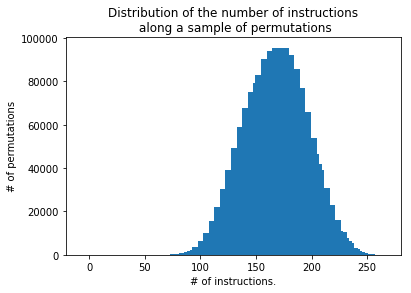

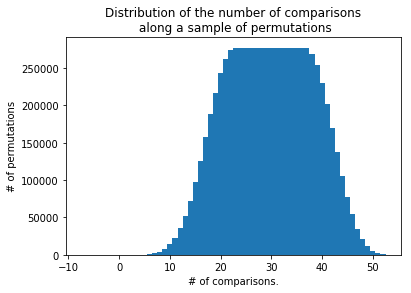

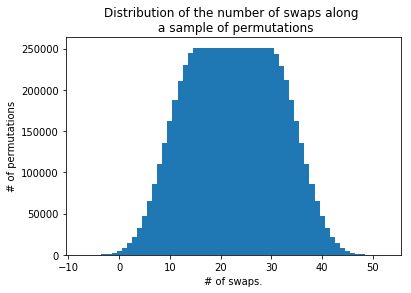

AVG instructions count 169.7009832451499 | AVG comparisons count 29.5683487654321 | AVG Instructions count 22.49796847442681


In [11]:
results = studyInsertionSort(10, False)

distribution = list(np.bincount(results[1]))
plotter.bar([distribution.index(x) for x in distribution],distribution,width=15)
plotter.xlabel("# of instructions.")
plotter.ylabel("# of permutations")
plotter.title("Distribution of the number of instructions\n along a sample of permutations")
plotter.show()

distribution = list(np.bincount(results[3]))
plotter.bar([distribution.index(x) for x in distribution],distribution,width=15)
plotter.xlabel("# of comparisons.")
plotter.ylabel("# of permutations")
plotter.title("Distribution of the number of comparisons\n along a sample of permutations")
plotter.show()

distribution = list(np.bincount(results[5]))
plotter.bar([distribution.index(x) for x in distribution],distribution,width=15)
plotter.xlabel("# of swaps.")
plotter.ylabel("# of permutations")
plotter.title("Distribution of the number of swaps along \n a sample of permutations")
plotter.show()

print("AVG instructions count {0} | AVG comparisons count {1} | AVG Instructions count {2}".format 
      (results[0], results[2], results[4]))

**Assessment with a set of 10! permutations, each containing 10 numbers, each ranging between 0 and 99 chosen randomly.**

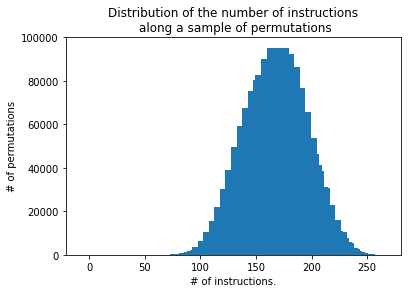

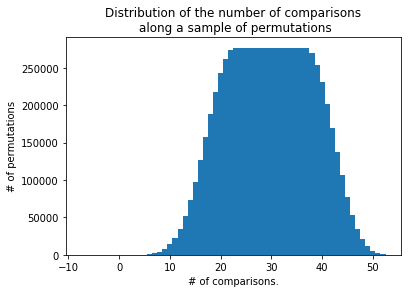

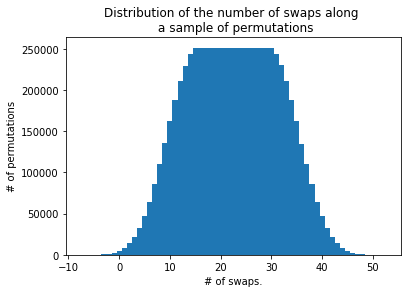

AVG instructions count 169.7041228505291 | AVG comparisons count 29.569354883156965 | AVG Instructions count 22.498029100529102


In [10]:
results = studyInsertionSort(10, False)

distribution = list(np.bincount(results[1]))
plotter.bar([distribution.index(x) for x in distribution],distribution,width=15)
plotter.xlabel("# of instructions.")
plotter.ylabel("# of permutations")
plotter.title("Distribution of the number of instructions\n along a sample of permutations")
plotter.show()

distribution = list(np.bincount(results[3]))
plotter.bar([distribution.index(x) for x in distribution],distribution,width=15)
plotter.xlabel("# of comparisons.")
plotter.ylabel("# of permutations")
plotter.title("Distribution of the number of comparisons\n along a sample of permutations")
plotter.show()

distribution = list(np.bincount(results[5]))
plotter.bar([distribution.index(x) for x in distribution],distribution,width=15)
plotter.xlabel("# of swaps.")
plotter.ylabel("# of permutations")
plotter.title("Distribution of the number of swaps along \n a sample of permutations")
plotter.show()

print("AVG instructions count {0} | AVG comparisons count {1} | AVG Instructions count {2}".format 
      (results[0], results[2], results[4]))
